# Morning practical 2:

In the first practical, you worked on getting the basics of hypothesis functions and gradient descent down. This was probably somewhat difficult, but extending this towards polynomial regression will be relatively easier now that you have the basis. Let's move towards polynomial regression. First, run the two code cells below, then move on. <br>

In [1]:
#run this cell to set things up
import ipywidgets as widgets, numpy as np, pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns
from IPython.display import display, Markdown
from sklearn.decomposition import PCA
%matplotlib notebook

In [2]:
#necessary functions you defined before:
def univariateHypothesis(x, thetas):
    predict = thetas[0] + thetas[1] * x
    return predict

def MyMSE(x, y, thetas):
    totalSumSquares = 0
    for index, val in enumerate(x):
        prediction = univariateHypothesis(val, thetas)
        squareError = (prediction-y[index])**2
        totalSumSquares += squareError
    meanSquaredError = totalSumSquares/len(x) 
    return meanSquaredError

def gradientDescent(x, y, thetas, alpha):
    m = len(x)
    #print("m: "); print(m)
    totalErrorThetaZero = 0
    totalErrorThetaOne = 0
    for index, x_val in enumerate(x):
        errorThetaZero = univariateHypothesis(x_val, thetas) - y[index]
        errorThetaOne  = (univariateHypothesis(x_val, thetas) - y[index]) * x_val
        totalErrorThetaZero += errorThetaZero
        totalErrorThetaOne += errorThetaOne
    
    thetaZeroStep = thetas[0] - alpha * (1/m) * totalErrorThetaZero
    thetaOneStep  = thetas[1] - alpha * (1/m) * totalErrorThetaOne
    return np.array([thetaZeroStep, thetaOneStep])
#sample data
data = np.loadtxt("sampleDataLinearRegression.csv", delimiter=',')
x_data, y_data = data[:,0], data[:,1]


## Making some dummy polynomial features
For polynomial regression, we first need some polynomial data. To get that, we give you this function called `makePolynomialFeatures` that takes in a feature column and an argument `power`, that returns a `numpy.ndarray` with a number of columns equal to power, where each column contains the original feature column raised to a power in `range(1, power+1)`. So `makePolynomialFeatures(np.array(featureColumn = [3,4,5], power = 3)` returns: <br> 
\[3; 9 ; 27\] <br>
\[4; 16; 64\] <br>
\[5; 25; 125\] <br>
<br>

Run the below cell to see it in action and move on to normalising the data.

In [4]:
def makePolynomialFeatures(x, power = 2, printit = False):
    data = []
    for i in range (1, power+1):
        data.append(x**i)
    if printit: print(data)
    finalArray = np.vstack(tuple(data)).T
    if printit: print(finalArray)
    return finalArray


        
testPolynomial = makePolynomialFeatures(x = x_data, power = 3)
display(testPolynomial)
print(testPolynomial.shape)
print(type(testPolynomial))

array([[2.00000e+00, 4.00000e+00, 8.00000e+00],
       [6.00000e+00, 3.60000e+01, 2.16000e+02],
       [1.00000e+01, 1.00000e+02, 1.00000e+03],
       [1.60000e+01, 2.56000e+02, 4.09600e+03],
       [1.80000e+01, 3.24000e+02, 5.83200e+03],
       [2.10000e+01, 4.41000e+02, 9.26100e+03],
       [2.30000e+01, 5.29000e+02, 1.21670e+04],
       [2.50000e+01, 6.25000e+02, 1.56250e+04],
       [3.00000e+01, 9.00000e+02, 2.70000e+04],
       [3.50000e+01, 1.22500e+03, 4.28750e+04],
       [3.80000e+01, 1.44400e+03, 5.48720e+04],
       [3.90000e+01, 1.52100e+03, 5.93190e+04],
       [3.90000e+01, 1.52100e+03, 5.93190e+04],
       [5.30000e+01, 2.80900e+03, 1.48877e+05],
       [5.70000e+01, 3.24900e+03, 1.85193e+05],
       [5.90000e+01, 3.48100e+03, 2.05379e+05],
       [6.30000e+01, 3.96900e+03, 2.50047e+05],
       [6.40000e+01, 4.09600e+03, 2.62144e+05],
       [6.90000e+01, 4.76100e+03, 3.28509e+05],
       [9.20000e+01, 8.46400e+03, 7.78688e+05],
       [9.30000e+01, 8.64900e+03, 8.0435

(21, 3)
<class 'numpy.ndarray'>


---
## Making a function for data normalisation
Good. You've seen in **Exercise 1** and in the lectures that the features should be normalised to make gradient descent work well. High time to write a function to normalise these features. Call it `createNormalisedFeatures`. The function should have two arguments: `featureArray` that accepts a 2D numpy array where columns are features, and `mode` that accepts two inputs, 'SD' and 'range'. For 'SD', the normalisation should return:
* the mean of each feature.
* the standard deviation of each feature.
* the normalised feature itself, using the formula: <br> $$\frac{(feature\ values - feature\ mean)}{feature\ standard\  deviation}$$ <br>

For 'range' as input the normalisation should return:
* the mean of each feature.
* the range of each feature (max - min).
* the normalised feature itself, using the formula:
$$\frac{(feature\ values - feature\ mean)}{(feature\ max - feature\ min)}$$

After you are done, test your function on a Numpy array with a linear and a quadratic feature (i.e. made with `power = 2` in `makePolynomialFeatures`) using `mode = 'range'`. Code to plot the features in this space has been provided below.

##### Why do we need the means and std. dev./range saved?

We need these saved so if we want to predict for an unseen data point, we can transform its features in the same way we do with our training data: by subtracting the means of the training data and dividing by the std.dev./range as we do in our normalisations.

##### Why these different normalisations? <br>
The SD normalisation brings features to *approximately* the \[-1,1\] range, however outliers still go slightly above or below this: we normalise based on the standard deviation or average difference of the data from the mean, so points that are far from this mean will have larger values. In other words: this assumes a normal distribution of data, and shrinks that distribution to have mean 0 and *most* of its observations in the \[-1,1\] range. <br>
The range normalisation brings everything to a \[-1,1\] range outright, no exceptions. Do note that if you have huge outliers, most data will be compressed to a tiny range, with the outliers being close to 1 or -1. Which is better? Truth be told, I don't know, and it probably depends. <br>
<br>
<b> Hints </b> 
* To return multiple values in one function, simply put them in a list: `return [thing1,thing2,ChickenLittle]`. In this case, order the return values like so: `[normalisedFeatures, featureMeans, featureSD/featureRanges]` <br>
* `np.mean()`, and `np.std()` are your friends here. Be sure to set the right axis!
* Run into broadcasting issues? Check out the `keepdims` argument.

---

[array([[-0.42386185, -0.26615991],
       [-0.37990581, -0.26245834],
       [-0.33594976, -0.25505522],
       [-0.2700157 , -0.23701011],
       [-0.24803768, -0.22914429],
       [-0.21507064, -0.21561045],
       [-0.19309262, -0.20543116],
       [-0.1711146 , -0.19432648],
       [-0.11616954, -0.16251618],
       [-0.06122449, -0.1249222 ],
       [-0.02825746, -0.09958963],
       [-0.01726845, -0.09068275],
       [-0.01726845, -0.09068275],
       [ 0.13657771,  0.0583051 ],
       [ 0.18053375,  0.10920158],
       [ 0.20251177,  0.1360379 ],
       [ 0.24646782,  0.19248671],
       [ 0.25745683,  0.20717728],
       [ 0.31240188,  0.28410036],
       [ 0.56514914,  0.71244044],
       [ 0.57613815,  0.73384009]]), array([[  40.57142857, 2304.95238095]]), array([[  91., 8645.]])]


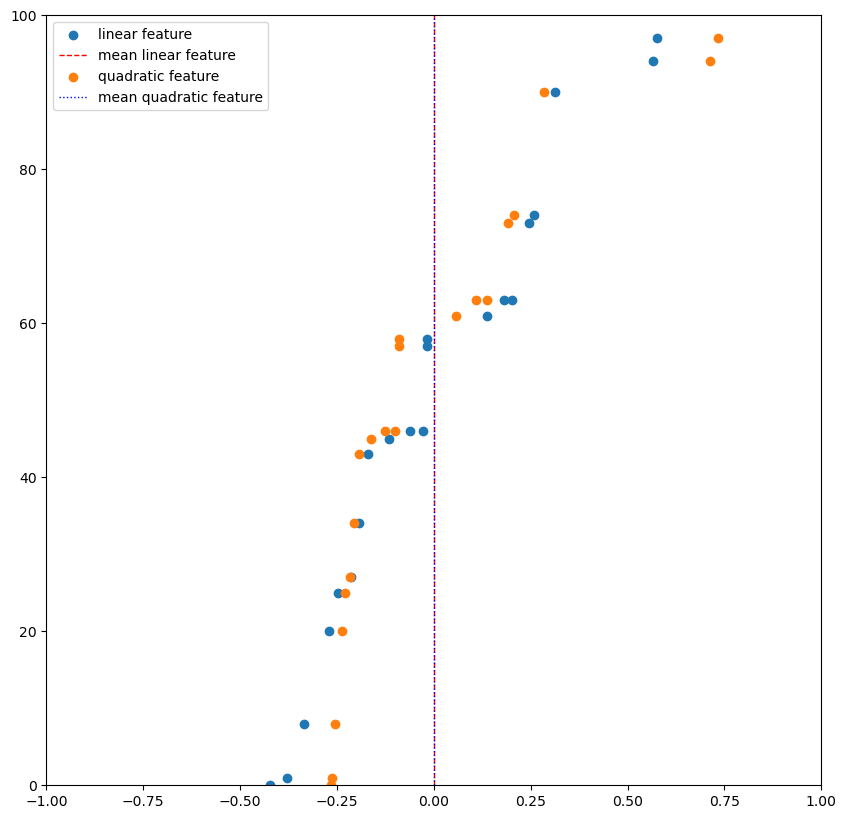

In [4]:
%matplotlib inline
#your answer here


#answer

def createNormalisedFeatures(featureArray, mode = "range", printit = False):
    if printit: print(featureArray)
    featureMeans = np.mean(featureArray, axis = 0, keepdims=True)
    if printit: print(featureMeans)
    if printit: print(featureArray-featureMeans)
    if mode == "range":
        featureRanges = np.max(featureArray, axis = 0, keepdims=True) - np.min(featureArray, axis = 0, keepdims=True)
        #broadcasting in action:
        normalisedFeatures = (featureArray - featureMeans)/featureRanges
        return [normalisedFeatures, featureMeans, featureRanges]
    elif mode == "SD":
        featureSDs = np.std(featureArray, axis = 0, keepdims=True)
        #broadcasting in action:
        normalisedFeatures = (featureArray - featureMeans)/featureSDs
        return [normalisedFeatures, featureMeans, featureSDs]

#for pandas, would look like:
# def createNormalisedFeatures(dataFrame, mode = "range"):
#     featureMeans = dataFrame.mean()
#     if mode == "range":
#         featureRanges = dataFrame.max() - dataFrame.min()
#         normalisedFeatures = (dataFrame - featureMeans)/featureRanges
#         return [normalisedFeatures, featureMeans, featureRanges]
#     elif mode == "SD":
#         featureSDs = dataFrame.std()
#         normalisedFeatures = (dataFrame - featureMeans)/featureSDs
#         return [normalisedFeatures, featureMeans, featureSDs]


#plotting code
runOnPowerTwoData = createNormalisedFeatures(makePolynomialFeatures(x_data, power = 2),
                                          mode = "range")

print(runOnPowerTwoData)
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlim([-1,1])
ax.set_ylim([0,100])
ax.scatter(runOnPowerTwoData[0][:,0], y_data, label = "linear feature")
ax.plot([np.mean(runOnPowerTwoData[0][:,0]), np.mean(runOnPowerTwoData[0][:,0])],
       [0,100], linestyle = 'dashed', linewidth = 1, color = "red", label = 'mean linear feature')
ax.scatter(runOnPowerTwoData[0][:,1], y_data, label = "quadratic feature")
ax.plot([np.mean(runOnPowerTwoData[0][:,1]), np.mean(runOnPowerTwoData[0][:,1])],
       [0,100], linestyle = 'dotted', linewidth = 1, color = "blue", label = 'mean quadratic feature')
ax.legend()




---

## Plotting different data normalisations
Run the below cell to see its effects on the sample linear regression data with only the normal feature (`data_x`). Note how every normalisation has slightly different characteristics (note the axis scales!).
<br>

---

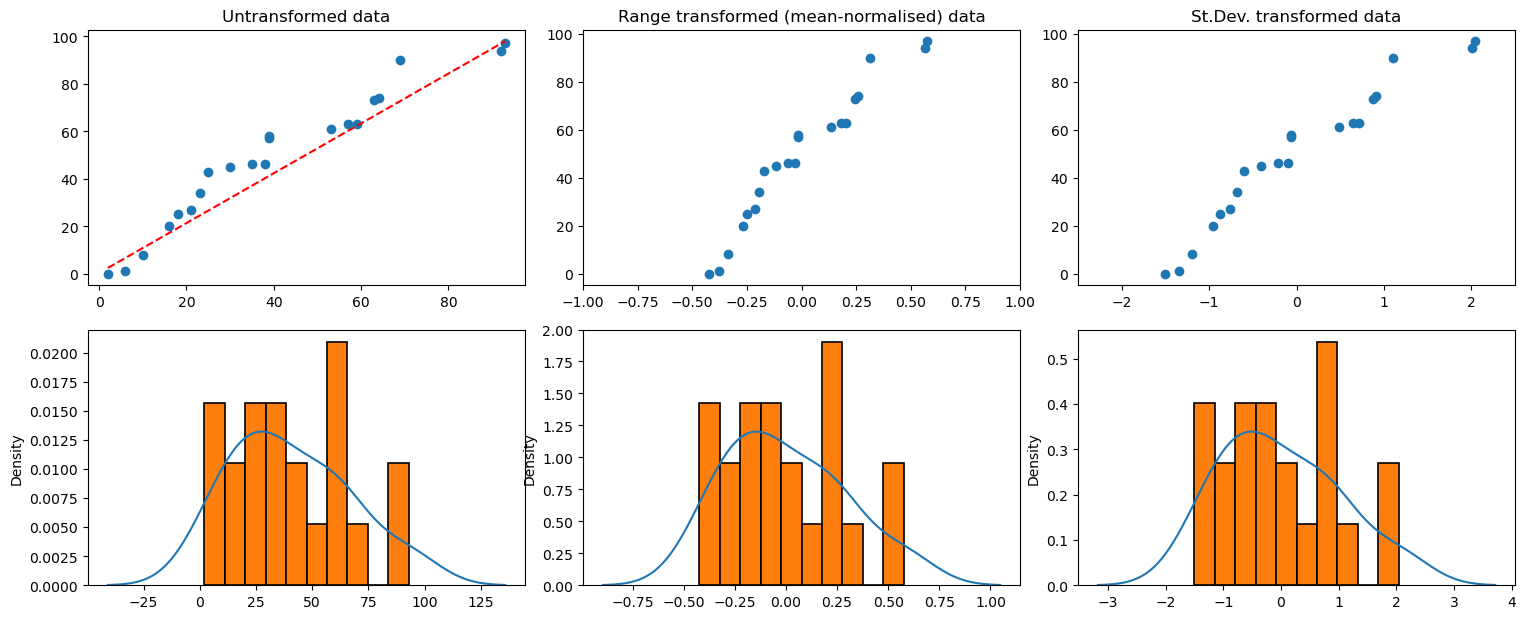

In [5]:
%matplotlib inline
#set up a figure
figNormPlot, ((ax1NormPlot, ax2NormPlot, ax3NormPlot), (ax4NormPlot, ax5NormPlot, ax6NormPlot)) = plt.subplots(2,3, figsize=(15,6.15))
figNormPlot.tight_layout()

#create normal scatterplot
ax1NormPlot.set_title("Untransformed data")
scatter = ax1NormPlot.scatter(x_data, y_data)
regressionLine, = ax1NormPlot.plot(x_data, 0.31 + 1.05 * x_data,
                                   color = 'red', linestyle = "dashed")

#range-normalised plot
ax2NormPlot.set_title("Range transformed (mean-normalised) data")
featsRange, featsRangeMean, featsRangeRange =  createNormalisedFeatures(x_data, mode = "range")
scatter = ax2NormPlot.scatter(featsRange, y_data)
ax2NormPlot.set_xlim([-1,1])

#st.dev.-normalised plot
ax3NormPlot.set_title("St.Dev. transformed data")
featsSD, featsSDMean, featsSDSD =  createNormalisedFeatures(x_data, mode = "SD")
scatter = ax3NormPlot.scatter(featsSD, y_data)
ax3NormPlot.set_xlim([-2.5,2.5])

#distribution plots. They all look the same, but note that the axis limits vary!
sns.kdeplot(data = np.array(x_data), ax = ax4NormPlot)
sns.kdeplot(data = np.array(featsRange), ax = ax5NormPlot)
sns.kdeplot(data = np.array(featsSD), ax = ax6NormPlot)
ax4NormPlot.hist(x_data, bins = 10, edgecolor='black', linewidth=1.2, density = True)
ax5NormPlot.hist(featsRange, bins = 10, edgecolor='black', linewidth=1.2, density = True)
ax6NormPlot.hist(featsSD, bins = 10, edgecolor='black', linewidth=1.2, density = True)

#show all plots
plt.show()

---

## Towards multivariate linear regression: updating the hypothesis function

Okay, now let's put it all together. First, update the hypothesis function to accomodate any number of features and parameters. It should take in the features for one sample, so a 1D array with features of length *n*, and a 1D array of thetas with length *n*, calculate $\theta_0, \theta_1 * x_1, ..., \theta_n * x_n$ and return the predicted value for the data point. Call it `multiHypothesis`. <br> <br>

<b> Hints </b>
* Loop over the thetas, and multiply each with the corresponding element in x. <br>
* In the function, you can prepend 1 to the features that the function takes in. By adding this feature that is 1, $\theta_0$ is multiplied by 1 when you use a for loop. To do this, you can use `np.concatenate()` with `np.array([1])` as one of the arrays to be concatenated.
* Actually you don't need the loop if you use Numpy so feel free to do it in the faster way.

---

In [6]:
test_array_multi = np.array([5, 10, 25])
test_thetas_multi = np.array([0.3, 4, 2, 8]) #theta_0 means one more.

#your answer here

#answer
def multiHypothesis(x, thetas, printit = False):
    #add a 1 to x as the first 'feature'
    one_to_add = np.array([1])
    if printit:
        print(x)
        print(one_to_add)
        print(x.shape)
        print(one_to_add.shape)
    x = np.concatenate((one_to_add, x))
    if printit: print(x)
    if not len(x) == len(thetas):
        print("Error, x and theta should have equal length!")
        return
    prediction = sum([curr_x * curr_theta for curr_x, curr_theta in zip(x, thetas)])
    #faster way
    if printit:
        print(x) 
        print(thetas)
    prediction = np.sum(x*thetas)
    return prediction

#test, answer should be 240.3
print(np.array([1]))
multiHypothesis(test_array_multi, test_thetas_multi)

[1]


240.3

---

## Towards multivariate regression: running gradient descent with `multiHypothesis`

Armed with this glorious function, we'll take the following steps:
* Use the `makePolynomialFeatures` function with `power = 2` to make features.
* Normalise the features using `createNormalisedFeatures`, with `mode = 'range'`.
* Use this normalised data in a linear regression with 2 variables by using gradient descent with this new hypothesis function. To do this, we need to change the `MyMSE` and `gradientDescent` functions to use the new `multiHypothesis` function to calculate cost. The new `MyMSE` function has been supplied as an example below. <br>
* <b> You need to change the `gradientDescent` function to use `multiHypothesis`! </b> <br> <br>

<b> Hints </b>
* You can assume that there are only two features. <br>
* `gradientDescent` should now return 3 values, for $\theta_0$ , $\theta_1$, and $\theta_2$. Do this in a 1D Numpy array, as before.

---

In [7]:
#start things off
startThetasHP = np.array([0,0,0])

featuresHP = makePolynomialFeatures(x_data, power = 2)

normalisedFeaturesHP, featureMeansHP, featureRangesHP = createNormalisedFeatures(featuresHP, mode = "range")
y_data = data[:,1]
display(normalisedFeaturesHP)


#change in MyMSE
def MyMSE(x, y, thetas):
    totalSumSquares = 0
    for index, val in enumerate(x):
        prediction = multiHypothesis(val, thetas)
        squareError = (prediction-y[index])**2
        totalSumSquares += squareError
    meanSquaredError = totalSumSquares/len(x) 
    return meanSquaredError

#sample usage:
exampleMSE = MyMSE(normalisedFeaturesHP, y_data, startThetasHP)
print("MSE for thetas " + np.array2string(startThetasHP) + ": " + str(exampleMSE))

#now it's up to you to change gradientDescent in a similar way in the cell below!

array([[-0.42386185, -0.26615991],
       [-0.37990581, -0.26245834],
       [-0.33594976, -0.25505522],
       [-0.2700157 , -0.23701011],
       [-0.24803768, -0.22914429],
       [-0.21507064, -0.21561045],
       [-0.19309262, -0.20543116],
       [-0.1711146 , -0.19432648],
       [-0.11616954, -0.16251618],
       [-0.06122449, -0.1249222 ],
       [-0.02825746, -0.09958963],
       [-0.01726845, -0.09068275],
       [-0.01726845, -0.09068275],
       [ 0.13657771,  0.0583051 ],
       [ 0.18053375,  0.10920158],
       [ 0.20251177,  0.1360379 ],
       [ 0.24646782,  0.19248671],
       [ 0.25745683,  0.20717728],
       [ 0.31240188,  0.28410036],
       [ 0.56514914,  0.71244044],
       [ 0.57613815,  0.73384009]])

MSE for thetas [0 0 0]: 3166.809523809524


In [24]:
#answer    
#Note: This one is quite Numpy-free. You can for sure do smarter things here! See below.
def gradientDescent(x, y, thetas, alpha):
    m = len(x)
    totalErrorThetaZero = 0
    totalErrorOtherThetas = [0] * (len(thetas)-1)
    for index, row in enumerate(x):
        #needed for all thetas, calculate the prediction only once.
        hypothesisOutcome = multiHypothesis(row, thetas)
        #calculate partial derivative theta zero.
        errorThetaZero = hypothesisOutcome - y[index]
        totalErrorThetaZero += errorThetaZero
        #theta zero partial derivative calculated. Now loop over all remaining thetas:
        for otherThetasIndex in range(0,len(totalErrorOtherThetas)):
            errorThisTheta  = (hypothesisOutcome - y[index]) * x[index, otherThetasIndex]
            totalErrorOtherThetas[otherThetasIndex] += errorThisTheta
    #now take a step for every theta
    finalThetas = []
    partialDerivativesAllThetas = totalErrorOtherThetas
    partialDerivativesAllThetas.insert(0, totalErrorThetaZero)
    #loop over all thetas, subtracting alpha/m * its partial derivative from what was put into the function.
    for index, theta in enumerate(partialDerivativesAllThetas):
        finalThetas.append(float(thetas[index]) - alpha/m * partialDerivativesAllThetas[index])
    
    return finalThetas

def gradientDescent(x, y, thetas, alpha):
    m = len(x)
    
    total_error_thetas = np.zeros_like(thetas)
    for index, row in enumerate(x):
        hypothesis_outcome = multiHypothesis(row, thetas)
        #add in ones (after hypothesis because hypothesis also does this)
        row_with_one = np.concatenate((np.array([1]), row))
        errors_this_sample = (hypothesis_outcome - y[index]) * row_with_one
        total_error_thetas = total_error_thetas + errors_this_sample
    final_thetas = thetas - alpha/m * total_error_thetas
    return final_thetas


---

## Running your very own multivariate linear regression algorithm
All done? Great! You've made it through Mean-Squared Error functions, gradient descent implementations, polynomial feature generation and gradient descent that works for >1 feature. Let's see this brand spankin' new set-up in action. Of course, the underlying data is actually linear, so the quadratic equation we're fitting here will not be the best fit. But it will improve thanks to your gradient descent function-writing prowess. Run the cell below and marvel (and/or feel slightly underwhelmed) at the results!

---


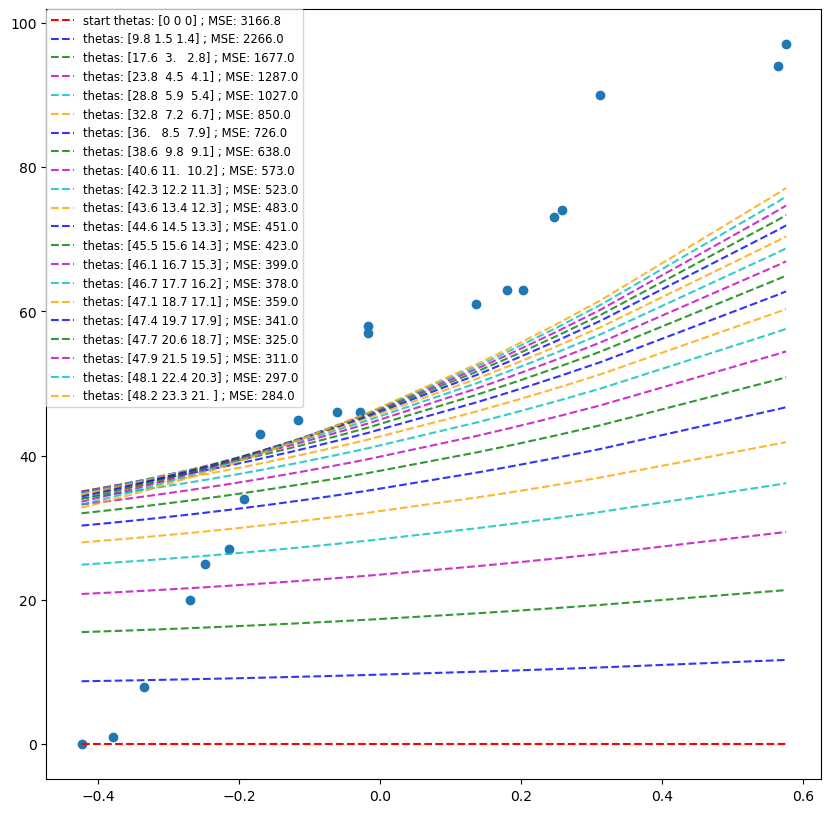

In [25]:
thetaValuesDuringDescent = []
MSEDuringDescent = []
thetasNow = startThetasHP.copy()
stepsGradDecent = 20
alpha = 0.8
for i in range(0,stepsGradDecent):
    oneStep = gradientDescent(normalisedFeaturesHP, y_data, thetasNow, alpha=0.2)
    thetaValuesDuringDescent.append(oneStep)
    thetasNow = oneStep
    MSEDuringDescent.append(MyMSE(normalisedFeaturesHP, y_data, thetasNow))
#print(thetaValuesDuringDescent)

fig10, ax10 = plt.subplots(figsize = (10,10))
scatter10One = ax10.scatter(normalisedFeaturesHP[:,0], y_data)
regressionLine10, = ax10.plot(normalisedFeaturesHP[:,0],
                              [multiHypothesis(row, startThetasHP) for row in normalisedFeaturesHP],
                              color = 'red', linestyle = "dashed",
                              label = "start thetas: " + str(startThetasHP) + " ; MSE: " + str(np.round(exampleMSE,1)))

colors = ['b', 'g', 'm', 'c', 'orange']
#repeat colours if more steps
colors = colors * int(np.ceil(len(thetaValuesDuringDescent)/5))
#show for all gradient steps
for i in range(0, len(thetaValuesDuringDescent)):
    
    ax10.plot(normalisedFeaturesHP[:,0],
                              [multiHypothesis(row, thetaValuesDuringDescent[i]) for row in normalisedFeaturesHP],
                              color = colors[i], linestyle = "dashed", alpha = 0.8,
                              label = "thetas: " + str(np.round(thetaValuesDuringDescent[i], 1)) + " ; MSE: " + str(np.round(MSEDuringDescent[i])))

ax10.legend(bbox_to_anchor=(0, 1), loc='upper left', borderaxespad=0, fontsize = "small")    
plt.show()


## Final words

"Aaarghh". But also: well done! Time for one more lecture, in which we'll dive into using linear algebra to make our calculations (and hopefully also our function definitions) easier, and/or further explore the bias-variance trade-off.

Note: linear regression actually has an algebraically defined minimum of the cost function, which can also be approached via something called the Normal Equation (given tractable data size). Hence, linear regression libraries will probably make use of this method if feasible, and many other speed ups and other features. Still, doing it yourself is an achievement!

## What I'd like you to remember here:
* Extending linear regression to multinomial (and polynomial, i.e. with exponents) regression is relatively straightforward once you have the basic routine down.
* How to normalise data. Especially the mean-centering and scaling to unit variance (data-mean(data))/std(data) is used very often. 
* Why normalising data is important: that otherwise you get gradients operating at different scales, messing up your gradient steps, and costs which are much higher for the polynomial variables than for the others. To avoid this, we normalise. You'll be using normalisation prodigiously throughout the rest of the course. Note that also, features that are on different scales would otherwise weigh differently in cost calculations etc. Squares of a feature that can have up to 10.000 as a value can become much higher than one that goes up only until 100.
* That running polynomial regression on a linear relationship is a bit bonkers (but illustrative, nonetheless)


## Survey
Hi it's me again, the incessant reminder that you fill out the survey. Boy, surveys huh, who doesn't love 'em!? Great minds think alike, [here you go](https://docs.google.com/forms/d/e/1FAIpQLScoqJtzOclzOl8DrXnoukfySI3HAdfJNeGw_Gxplas09KdEDw/viewform?usp=sf_link)!